In [36]:
import pandas as pd
import seaborn as sns

In [37]:
x=pd.read_csv("train.csv")
y=pd.read_csv("test.csv")

In [38]:
aim=x.Survived
x.drop(columns="Survived", inplace=True)

In [39]:
aim.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [40]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
y.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
y.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

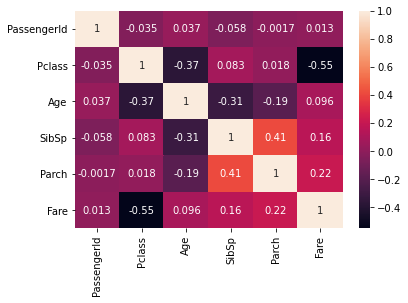

In [44]:
sns.heatmap(x.corr(),annot=True)

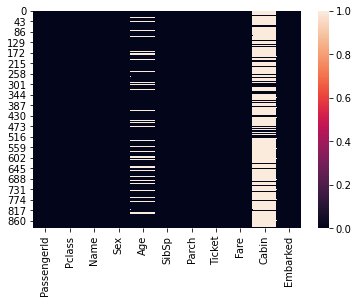

In [45]:
sns.heatmap(x.isnull())

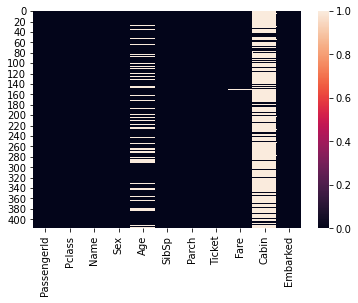

In [46]:
sns.heatmap(y.isnull())

In [47]:
y_id=y.PassengerId
y_id.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [48]:
x.columns
y.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
drop_col=['PassengerId','Name','Cabin','Ticket','Embarked']
drop_col

['PassengerId', 'Name', 'Cabin', 'Ticket', 'Embarked']

In [50]:
x.drop(columns=drop_col,inplace=True)
y.drop(columns=drop_col,inplace=True)

In [51]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [52]:
x=pd.get_dummies(x,drop_first=True)
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


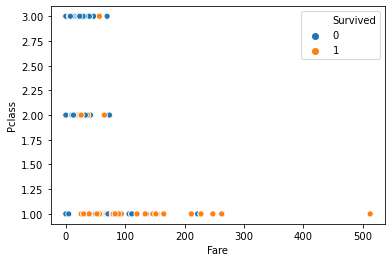

In [53]:
sns.scatterplot(x.Fare, x.Pclass,hue=aim)

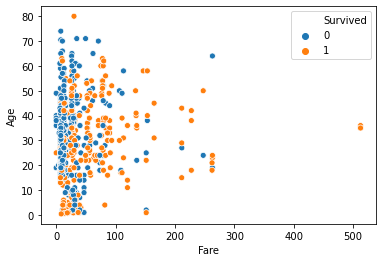

In [54]:
sns.scatterplot(x.Fare, x.Age,hue=aim)

In [55]:
x.Fare[x.Fare>300]

258    512.3292
679    512.3292
737    512.3292
Name: Fare, dtype: float64

In [56]:
x.Fare[x.Fare>500]

258    512.3292
679    512.3292
737    512.3292
Name: Fare, dtype: float64

In [57]:
x.Fare[x.Fare>300]=300

<ipython-input-57-00d474164914>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Fare[x.Fare>300]=300


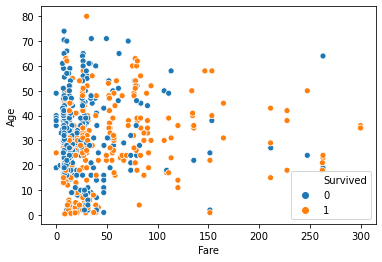

In [58]:
sns.scatterplot(x.Fare,x.Age,hue=aim)

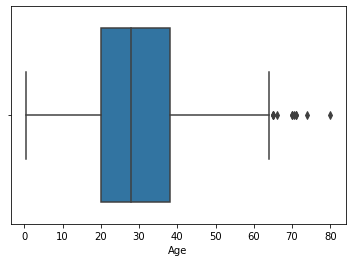

In [59]:
sns.boxplot(x.Age)

In [60]:
x.isnull().sum()

Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Sex_male      0
dtype: int64

In [61]:
y.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

In [62]:
x.fillna(x.mean(),inplace=True)
y.fillna(y.mean(),inplace=True)

In [63]:
x.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex_male    0
dtype: int64

In [64]:
y.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [65]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [66]:
x_train,x_test,t_train,t_test=train_test_split(x,aim,test_size=.30,random_state=0)

In [67]:
x.shape

(891, 6)

In [68]:
y.shape

(418, 6)

In [69]:
# df=pd.DataFrame()

In [70]:
# df=pd.read_csv("train.csv")
# df=pd.read_csv("test.csv")
# x=x.reshape((418,6))
# y=y.reshape((418,6))

In [71]:
rf=RandomForestClassifier(random_state=1,n_estimators=200)

In [72]:
rf.fit(x_train,t_train)

RandomForestClassifier(n_estimators=200, random_state=1)

In [77]:
result=rf.predict(x_test)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(t_test,result)

0.832089552238806

In [80]:
y.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [82]:
y.Sex=pd.get_dummies(y.Sex,drop_first=True)

In [83]:
y.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875


In [84]:
result_y=rf.predict(y)

In [86]:
final=pd.DataFrame({"PassengerId":y_id,"Survived":result_y})

In [88]:
final.to_csv("submit.csv",index=False)

In [89]:
pd.read_csv("Submit.csv").head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [90]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [91]:
ss.fit_transform(y)

array([[ 0.87348191,  0.75592895,  0.3349926 , -0.49947002, -0.4002477 ,
        -0.49840706],
       [ 0.87348191, -1.32287566,  1.32553003,  0.61699237, -0.4002477 ,
        -0.51327429],
       [-0.31581919,  0.75592895,  2.51417495, -0.49947002, -0.4002477 ,
        -0.46508846],
       ...,
       [ 0.87348191,  0.75592895,  0.65196458, -0.49947002, -0.4002477 ,
        -0.50879189],
       [ 0.87348191,  0.75592895,  0.        , -0.49947002, -0.4002477 ,
        -0.4944482 ],
       [ 0.87348191,  0.75592895,  0.        ,  0.61699237,  0.61989583,
        -0.23790598]])

In [92]:
result_sclr=rf.predict(y)

In [93]:
final_sclr=pd.DataFrame({"PassengerId":y_id,"Survived":result_sclr})
final_sclr.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [94]:
final_sclr.to_csv("Submit_final.csv",index=False)